# Streaming Services Analysis

## 1.0 Executive Summary

This analysis considered Movies and TV shows hosted by four popular streaming services: 1) Netflix, 2) Hulu, 3) Disney+, and 4) Amazon Prime. The primary focus for this analysis was on the movies and TV shows durations and ratings. The objectives included determining how the duration and ratings trend across platforms and through time based on their release year.

The average duration of movies across the platforms is approximately 90 minutes, with Netflix have the longer moves on average at 100 minutes and Disney+ have the shortest movies on average at 72 minutes. The longest movie was a popular ambient sleep movie on Amazon Prime with a duration of 10 hours. While examining the minimums indicated there may be trailers within the dataset, however with out manual examination of all titles these could not be distinguished short films. The most common duration of TV shows on all platforms was one season which is likely driven by more recent streaming only series. Disney+ has the highest percentage of TV shows with 3-5 season available, and Hulu had the highest percentage of TV shows with 6+ season.

Of the four platforms Netflix and Hulu had the highest number of moves suitable only for adults, while Amazon Prime's movie selection was best suited for older children, and Disney+ was best suited for general audiences. In general TV shows across all four platforms are more suitable for a younger audience then movies. 

Examining duration by release year showed a peak in duration for movies released in the 1960s. This was then followed by a slight decrease and the duration of movies stabilizing between 75 to 125 minutes. The number of season based on release year show a clear decreasing trend for more recent TV shows. The average number of season for each platform remained relatively consistent till the lates 2000s. Following the 2000s there appears to be a clear decreasing trend in the number of season a TV show has and in the late 2010s across all platforms the average duration is approximately 1 season.

## 2.0 Background

Streaming tv shows and movies continues to be on the rise. This analysis will focus on 4 major streaming services including Amazon Prime Video, Disney+, Hulu, and Netflix. The objectives of this analysis is to further understand how how duration and rating of TV Shows and Movies vary through time and across streaming service.

## 3.0 Environment Setup

### 3.1 Library Import

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import datetime

%matplotlib inline

## 4.0 Data Import

### 4.1 Data Descriptions

* **show_id:** unique ID for every Movie/TV Show
* **type:** identifies whether the content is a Movie or TV Show
* **title:** title of the Movie/TV Show
* **director:** director's name
* **cast:** actors/actresses involved in the Movie/TV Show
* **country:** country where the Movie/TV Show was produced
* **date_added:** date the Movie/TV Show was added to the platform
* **release_year:** actual release year of the Movie/TV Show
* **rating:** TV rating of the Movie/TV Show
* **duration:** total duration in minutes for Movies and the number of seasons for TV Shows
* **listed_in:** genre
* **description:** summary description of the Movie/TV Show

### 4.2 Netflix Movies and TV Shows
*Netflix Data Source: [Netflix Movies and TV Shows](https://www.kaggle.com/datasets/shivamb/netflix-shows)*   

Netflix is a popular media and video streaming platform with thousands of TV shows and movies available on the platform. This dataset is a collection of all the movies and TV shows available on Netflix with associated details (e.g. duration, release year, rating).

In [2]:
netflix_df = pd.read_csv('datasets/netflix_titles.csv')
netflix_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,25-Sep-21,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,24-Sep-21,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,24-Sep-21,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,24-Sep-21,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,24-Sep-21,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


### 4.3 Amazon Prime Movies and TV Shows
*Amazon Prime Data Source: [Amazon Prime Movies and TV Shows](https://www.kaggle.com/datasets/shivamb/amazon-prime-movies-and-tv-shows)*   

Amazon Prime is a major media and video streaming platform with thousands of movies and TV Shows available on the platform. This data set is a collection of all the movies and TV shows available on Amazon Prime with associated details (e.g. duration, release year, rating).

In [3]:
amazon_df = pd.read_csv('datasets/amazon_prime_titles.csv')
amazon_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,The Grand Seduction,Don McKellar,"Brendan Gleeson, Taylor Kitsch, Gordon Pinsent",Canada,30-Mar-21,2014,NaN,113 min,"Comedy, Drama",A small fishing village must procure a local d...
1,s2,Movie,Take Care Good Night,Girish Joshi,"Mahesh Manjrekar, Abhay Mahajan, Sachin Khedekar",India,30-Mar-21,2018,13+,110 min,"Drama, International",A Metro Family decides to fight a Cyber Crimin...
2,s3,Movie,Secrets of Deception,Josh Webber,"Tom Sizemore, Lorenzo Lamas, Robert LaSardo, R...",United States,30-Mar-21,2017,NaN,74 min,"Action, Drama, Suspense",After a man discovers his wife is cheating on ...
3,s4,Movie,Pink: Staying True,Sonia Anderson,"Interviews with: Pink, Adele, Beyoncé, Britney...",United States,30-Mar-21,2014,NaN,69 min,Documentary,"Pink breaks the mold once again, bringing her ..."
4,s5,Movie,Monster Maker,Giles Foster,"Harry Dean Stanton, Kieran O'Brien, George Cos...",United Kingdom,30-Mar-21,1989,NaN,45 min,"Drama, Fantasy",Teenage Matt Banting wants to work with a famo...


### 4.4 Disney+ Movies and TV Shows
*Disney+ Data Source: [Disney+ Movies and TV Shows](https://www.kaggle.com/datasets/shivamb/disney-movies-and-tv-shows)*   

Disney+ is a major media and video streaming platform. This data set is a collection of all the movies and TV shows available on Disney+ with associated details (e.g. duration, release year, rating).

In [4]:
disney_df = pd.read_csv('datasets/disney_plus_titles.csv')
disney_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Duck the Halls: A Mickey Mouse Christmas Special,"Alonso Ramirez Ramos, Dave Wasson","Chris Diamantopoulos, Tony Anselmo, Tress MacN...",NaN,26-Nov-21,2016,TV-G,23 min,"Animation, Family",Join Mickey and the gang as they duck the halls!
1,s2,Movie,Ernest Saves Christmas,John Cherry,"Jim Varney, Noelle Parker, Douglas Seale",NaN,26-Nov-21,1988,PG,91 min,Comedy,Santa Claus passes his magic bag to a new St. ...
2,s3,Movie,Ice Age: A Mammoth Christmas,Karen Disher,"Raymond Albert Romano, John Leguizamo, Denis L...",United States,26-Nov-21,2011,TV-G,23 min,"Animation, Comedy, Family",Sid the Sloth is on Santa's naughty list.
3,s4,Movie,The Queen Family Singalong,Hamish Hamilton,"Darren Criss, Adam Lambert, Derek Hough, Alexa...",NaN,26-Nov-21,2021,TV-PG,41 min,Musical,"This is real life, not just fantasy!"
4,s5,TV Show,The Beatles: Get Back,NaN,"John Lennon, Paul McCartney, George Harrison, ...",NaN,25-Nov-21,2021,NaN,1 Season,"Docuseries, Historical, Music",A three-part documentary from Peter Jackson ca...


### 4.5 Hulu Movies and TV Shows
Hulu Data Source: [Hulu Movies and TV Shows](https://www.kaggle.com/datasets/shivamb/hulu-movies-and-tv-shows)

Hulu is a popular media and video streaming platform. Hulu is exclusive to the U.S. and is not available in other countries. This data set is a collection of all the movies and TV shows available on Hulu with associated details (e.g. duration, release year, rating).

In [5]:
hulu_df = pd.read_csv('datasets/hulu_titles.csv')
hulu_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Ricky Velez: Here's Everything,NaN,NaN,NaN,24-Oct-21,2021,TV-MA,NaN,"Comedy, Stand Up",​Comedian Ricky Velez bares it all with his ho...
1,s2,Movie,Silent Night,NaN,NaN,NaN,23-Oct-21,2020,NaN,94 min,"Crime, Drama, Thriller","Mark, a low end South London hitman recently r..."
2,s3,Movie,The Marksman,NaN,NaN,NaN,23-Oct-21,2021,PG-13,108 min,"Action, Thriller",A hardened Arizona rancher tries to protect an...
3,s4,Movie,Gaia,NaN,NaN,NaN,22-Oct-21,2021,R,97 min,Horror,A forest ranger and two survivalists with a cu...
4,s5,Movie,Settlers,NaN,NaN,NaN,22-Oct-21,2021,NaN,104 min,"Science Fiction, Thriller",Mankind's earliest settlers on the Martian fro...


## 5.0 Exploratory Data Analysis

### 5.1 Setup

In [6]:
# Create Reference DataFrame
dataframe_dict = {}
# List of dataframe names used to interate over each dataframe
dataset_names = ['netflix', 'hulu', 'disney', 'amazon']

# Create and populate the raw_data dictionary of dataframes
dataframe_dict['raw_data'] = {
    'netflix':netflix_df,
    'hulu':hulu_df,
    'disney':disney_df,
    'amazon':amazon_df
}

# Create sub dataframe of plotting collors
dataframe_dict['colors'] = {
    'red':'#C44E52',
    'green':'#55A868',
    'blue':'#4C72B0',
    'orange':'#DD8452'
}

### 5.2 Null Data Analysis

In [7]:
# Calculate the percent null for all columns across all datasets

# New sub dictionary
dataframe_dict['null_calc'] = {}

for i in range (len(dataframe_dict['raw_data'])):
    key = dataset_names[i]
    value = round(dataframe_dict['raw_data'][dataset_names[i]].isnull().sum()/len(dataframe_dict['raw_data'][dataset_names[i]]) * 100,0)
    value = value.to_frame(name='percent_null')
    value.reset_index(inplace=True)

    dataframe_dict['null_calc'][key] = value

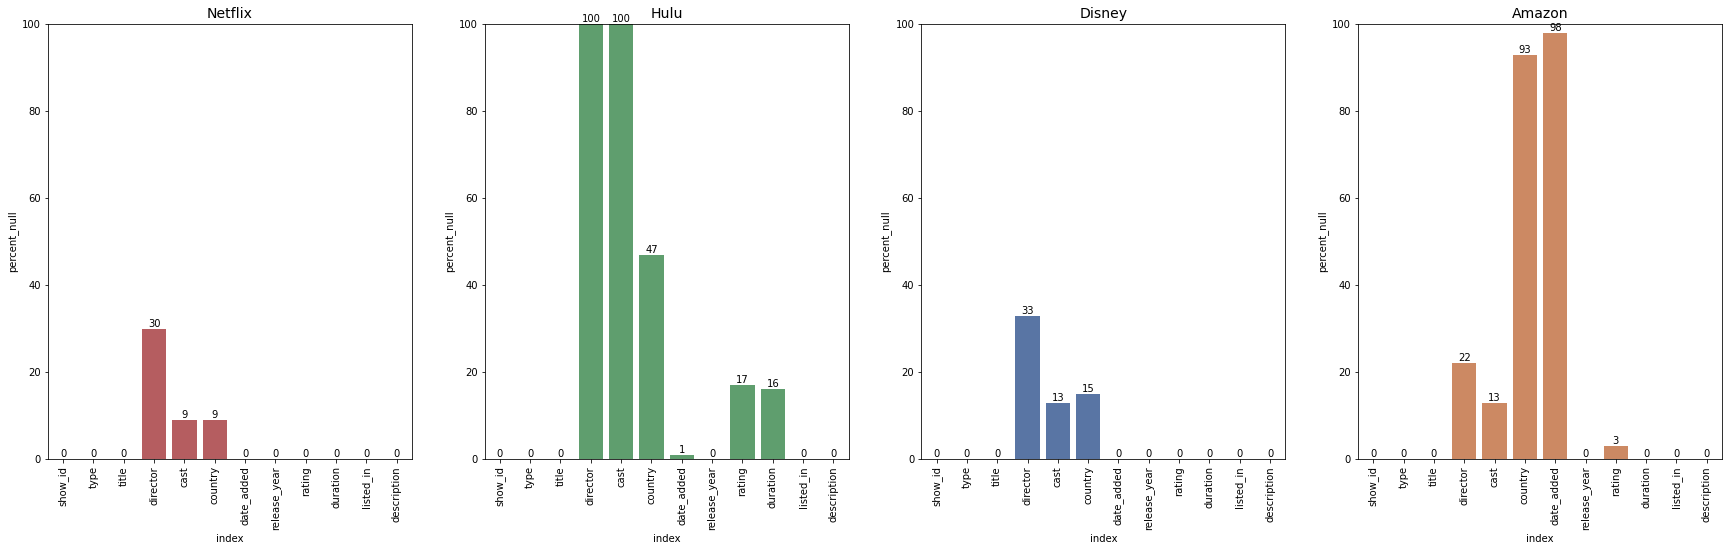

In [8]:
# Create Bar Chart of the percent nulls
list_of_colors = ['red', 'green', 'blue', 'orange']

# Bar Chart of Null Percentages
fig, ax = plt.subplots(1,4, figsize=(30,8))

for i in range(len(dataframe_dict['null_calc'])):
    plot = sns.barplot(x='index', y='percent_null', data=dataframe_dict['null_calc'][dataset_names[i]], color = dataframe_dict['colors'][list_of_colors[i]], ax=ax[i])
    plot.set_xticklabels(plot.get_xticklabels(), rotation='vertical')
    plot.set_title(dataset_names[i].title(), fontsize=14)
    plot.bar_label(plot.containers[0])
    plot.set_ylim(0,100)


Across the four streaming platforms it can been seen that common columns with null values include director, cast, and country. These fields are not a focus for this analysis and will be dropped from all datasets.

This analysis will focus on the rating and duration fields. The Hulu dataset rating field contains 17% null values and the duration field has 16%. The Amazon Prime dataset rating field contains 3% null values. Prior to analysis the rating null values will be filled with a set values of "Unknown". For this analysis duration will be transformed to a numeric value representing the number of minutes or season. For the analysis any null values in the duration field will be dropped during the transformation of this field.

### 5.3 Duplicated Data Analysis

In [9]:
for i in range(len(dataframe_dict['raw_data'])):
    count_dup = dataframe_dict['raw_data'][dataset_names[i]].duplicated('title').sum()
    print(f'Number of Duplicated Titles ({dataset_names[i].title()}): {count_dup}')

Number of Duplicated Titles (Netflix): 3
Number of Duplicated Titles (Hulu): 0
Number of Duplicated Titles (Disney): 0
Number of Duplicated Titles (Amazon): 0


In [10]:
netflix_df[netflix_df.duplicated('title')]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
5964,s5965,TV Show,9-Feb,NaN,"Shahd El Yaseen, Shaila Sabt, Hala, Hanadi Al-...",NaN,20-Mar-19,2018,TV-14,1 Season,"International TV Shows, TV Dramas","As a psychology professor faces Alzheimer's, h..."
5965,s5966,Movie,22-Jul,Paul Greengrass,"Anders Danielsen Lie, Jon Øigarden, Jonas Stra...","Norway, Iceland, United States",10-Oct-18,2018,R,144 min,"Dramas, Thrillers","After devastating terror attacks in Norway, a ..."
5966,s5967,Movie,15-Aug,Swapnaneel Jayakar,"Rahul Pethe, Mrunmayee Deshpande, Adinath Koth...",India,29-Mar-19,2019,TV-14,124 min,"Comedies, Dramas, Independent Movies","On India's Independence Day, a zany mishap in ..."


Netflix is the only dataset that duplicated titles were found. Following additional investigation it was determined that these were no duplicated Movie/TV Shows and all three will remain in the dataset.

## 6.0 Cleaning Datasets

In [11]:
# Clean datasets

# New sub dictionary
dataframe_dict['clean_data'] = {}

for i in range (len(dataframe_dict['raw_data'])):
    key = dataset_names[i]
    # Drop extra columns from the datasets
    value = dataframe_dict['raw_data'][dataset_names[i]].drop(['show_id', 'director', 'cast', 'country', 'listed_in', 'description'], axis='columns')
    # Transform date_added to a datetime
    value['date_added'] = pd.to_datetime(value['date_added'])
    # Fill and NaN in rating with Unknown
    value['rating'].fillna('Unknown', inplace=True)
    #  Analysis requires the calculation of of a numerical duration NaN cannot be converted
    value = value.dropna(subset=['duration'])

    # Add additional columns (feature engineering)
    value['duration_value'] = value['duration'].str.split(' ').str[0].astype(int)
    value['month_added'] = value['date_added'].dt.month
    value['day_added'] = value['date_added'].dt.day

    dataframe_dict['clean_data'][key] = value


## 7.0 Data Analysis

### 7.1 Duration by Type Analysis

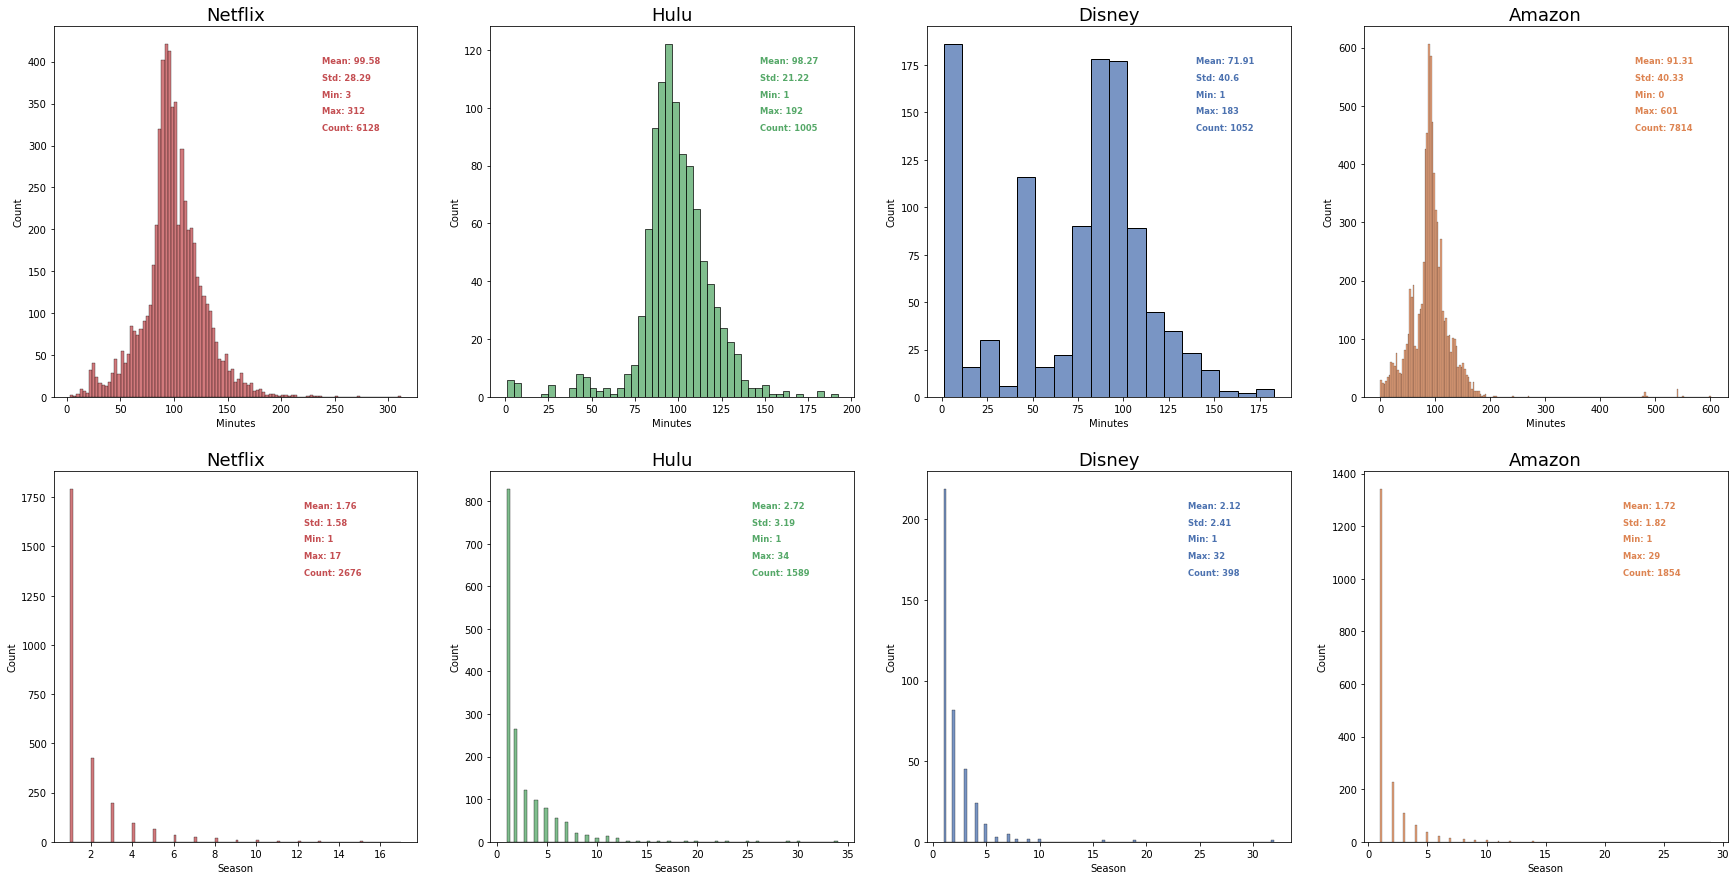

In [12]:
fig, ax = plt.subplots(2,4, figsize=(30,15))

for j in range(0,2):
    
    if j == 0:
        type_criteria = 'Movie'
        label = 'Minutes'
    else:
        type_criteria = 'TV Show'
        label = 'Season'

    for i in range(len(dataframe_dict['clean_data'])):
        # Construct Plot for each dataset'
        df = dataframe_dict['clean_data'][dataset_names[i]]
        data = df[df['type'] == type_criteria]
        plot = sns.histplot(data=data, x='duration_value', color=dataframe_dict['colors'][list_of_colors[i]], ax=ax[j, i])
        plot.set_xlabel(label)
        
        
        plot.set_title(dataset_names[i].title(), size= 18)
        
        # Add descriptive statistics to each plot
        x_position = (plot.get_xlim()[1] - plot.get_xlim()[0])*0.7
        y_position = plot.get_ylim()[1]*0.9
        plot.text(y=y_position, x=x_position, s=f'Mean: {round(df[df["type"]==type_criteria]["duration_value"].mean(),2)}', size='small', color=dataframe_dict['colors'][list_of_colors[i]], weight='semibold')
        plot.text(y=y_position*0.95, x=x_position, s=f'Std: {round(df[df["type"]==type_criteria]["duration_value"].std(),2)}', size='small', color=dataframe_dict['colors'][list_of_colors[i]], weight='semibold')
        plot.text(y=y_position*0.9, x=x_position, s=f'Min: {round(df[df["type"]==type_criteria]["duration_value"].min(),2)}', size='small', color=dataframe_dict['colors'][list_of_colors[i]], weight='semibold')
        plot.text(y=y_position*0.85, x=x_position, s=f'Max: {round(df[df["type"]==type_criteria]["duration_value"].max(),2)}', size='small', color=dataframe_dict['colors'][list_of_colors[i]], weight='semibold')
        plot.text(y=y_position*0.8, x=x_position, s=f'Count: {len(df[df["type"]==type_criteria]["duration_value"])}', size='small', color=dataframe_dict['colors'][list_of_colors[i]], weight='semibold')

The average duration of movies across all platforms is approximately 90 minutes. Of all the platforms Netflix has the longest movies on average at approximately 100 minutes, while Disney+ has the shortest movies on average at approximately 72 minutes. The longest movie across all platforms is Amazon Prime’s Soothing Surf at Del Norte for Sleep black screen with a duration of 10 hours. The video is one of the platforms most popular ambient sleep videos which explains why it is likely so long. Netflix’s Black Mirror: Bandersnatch is the second longest movie with a duration of approximately 5 hours. This is a choose-your-own-adventure movie and the complete 5 hours of footage cannot be accessed during one run through. The minimums of the movies are all 3 minutes or less, these are attributable to short films such as Netflix’s Silent with a duration of 3 minutes or trailers as seen in the Amazon Prime dataset with Baymax! which does not fully release until summer of 2022.

Across all platforms most of the TV Shows have only one season available at 67%, 52%, 55%, and 72% for Netflix, Hulu, Disney+, and Amazon Prime, respectively. Disney+ has the highest percentage of TV shows with 3-5 seasons at 40% while Netflix, Hulu, and Amazon Prime have 29%, 36%, and 24%, respectively. Hulu has the highest percentage of TV shows with 6+ season at 12% while all other platforms are less than 5%. The TV show with the highest number of seasons is Hulu’s Survivor with 34 season since its release in 2000, while the longest running show is The Simpsons on Disney+ running for 32 seasons since its release in 1989.

#### 7.1.1 Duration By Type Details

In [13]:
for i in range(len(dataframe_dict['clean_data'])):
    # Construct Plot for each dataset'
    df = dataframe_dict['clean_data'][dataset_names[i]]
    data = df[df['type'] == 'Movie']

    max_year = data.loc[data['duration_value'].idxmax()]['release_year']
    max_duration  = data.loc[data['duration_value'].idxmax()]['duration_value']
    max_title = data.loc[data['duration_value'].idxmax()]['title']

    print(f'{dataset_names[i].title()} Max: {max_title} with a duration of {max_duration} minutes released in {max_year}')


Netflix Max: Black Mirror: Bandersnatch with a duration of 312 minutes released in 2018
Hulu Max: Stephen King's It with a duration of 192 minutes released in 1990
Disney Max: Marvel Studios' Avengers: Endgame with a duration of 183 minutes released in 2019
Amazon Max: Soothing Surf at Del Norte for Sleep black screen with a duration of 601 minutes released in 2018


In [14]:
for i in range(len(dataframe_dict['clean_data'])):
    # Construct Plot for each dataset'
    df = dataframe_dict['clean_data'][dataset_names[i]]
    data = df[df['type'] == 'Movie']

    min_year = data.loc[data['duration_value'].idxmin()]['release_year']
    min_duration  = data.loc[data['duration_value'].idxmin()]['duration_value']
    min_title = data.loc[data['duration_value'].idxmin()]['title']

    print(f'{dataset_names[i].title()} Max: {min_title} with a duration of {min_duration} minutes released in {min_year}')

Netflix Max: Silent with a duration of 3 minutes released in 2014
Hulu Max: Next Level with a duration of 1 minutes released in 2019
Disney Max: Baymax! with a duration of 1 minutes released in 2021
Amazon Max: Testing title - Parichey is using this title with a duration of 0 minutes released in 2020


In [15]:
for i in range(len(dataframe_dict['clean_data'])):
    # Construct Plot for each dataset'
    df = dataframe_dict['clean_data'][dataset_names[i]]
    data = df[df['type'] == 'TV Show']

    max_year = data.loc[data['duration_value'].idxmax()]['release_year']
    max_duration  = data.loc[data['duration_value'].idxmax()]['duration_value']
    max_title = data.loc[data['duration_value'].idxmax()]['title']

    print(f'{dataset_names[i].title()} Max: {max_title} with a duration of {max_duration} season released in {max_year}')

Netflix Max: Grey's Anatomy with a duration of 17 season released in 2020
Hulu Max: Survivor with a duration of 34 season released in 2000
Disney Max: The Simpsons with a duration of 32 season released in 1989
Amazon Max: The Amazing Race with a duration of 29 season released in 2017


In [16]:
for i in range(len(dataframe_dict['clean_data'])):

    df = dataframe_dict['clean_data'][dataset_names[i]]

    data_1 = df[(df['type'] == 'TV Show') & (df['duration_value'] == 1)]
    one_season_per = round(len(data_1)/len(df[df['type']=='TV Show'])*100,2)
    print(f'{dataset_names[i].title()} Percent of Show with 1 Season: {one_season_per}%')

    data_35 = df[(df['type'] == 'TV Show') & (df['duration_value'] > 1) & (df['duration_value'] <= 5)]
    mid_season_per = round(len(data_35)/len(df[df['type']=='TV Show'])*100,2)
    print(f'{dataset_names[i].title()} Percent of Show with 3-5 Season: {mid_season_per}%')

    data_6more = df[(df['type'] == 'TV Show') & (df['duration_value'] > 5)]
    high_season_per = round(len(data_6more)/len(df[df['type']=='TV Show'])*100,2)
    print(f'{dataset_names[i].title()} Percent of Show with 6+ Season: {high_season_per}%\n')

Netflix Percent of Show with 1 Season: 67.0%
Netflix Percent of Show with 3-5 Season: 29.3%
Netflix Percent of Show with 6+ Season: 3.7%

Hulu Percent of Show with 1 Season: 52.17%
Hulu Percent of Show with 3-5 Season: 35.56%
Hulu Percent of Show with 6+ Season: 12.27%

Disney Percent of Show with 1 Season: 55.03%
Disney Percent of Show with 3-5 Season: 40.7%
Disney Percent of Show with 6+ Season: 4.27%

Amazon Percent of Show with 1 Season: 72.38%
Amazon Percent of Show with 3-5 Season: 23.73%
Amazon Percent of Show with 6+ Season: 3.88%



### 7.2 Rating Analysis by Streaming Service

#### 7.2.1 Rating Definitions

**TV Ratings**
* TV-Y: All  Children - Intended for children ages 2 to 6
* TV-Y7: Directed to Older Children - Intended for children ages 7 and older
* TV-Y7-FV: Directed to Older Children - Intended for older children, contains fantasy violence
* TV-G: General Audience - Intended for all ages
* TV-PG: Parental Guidance Suggested - Intended for younger children in the company of an adult
* TV-14: Parents Strongly Cautioned - Intended for children ages 14 and older in the company of an adult
* TV-MA: Mature Audience Only - Intended for adults and may be unsuitable for children under 17

**Movie Ratings**
* G: General Audiences - Designed to be appropriate for all ages
* PG: Parental Guidance - Parents are urged to give parental guidance
* PG-13: Parents Strongly Cautioned - Some material may not be suited for children under age 13
* R: Restricted - Films designed to be viewed by adults
* NC-17: Clearly Adult - Films that MPAA believes most parents will consider inappropriate to children 17 and under

#### 7.2.2 Media Type: Movie

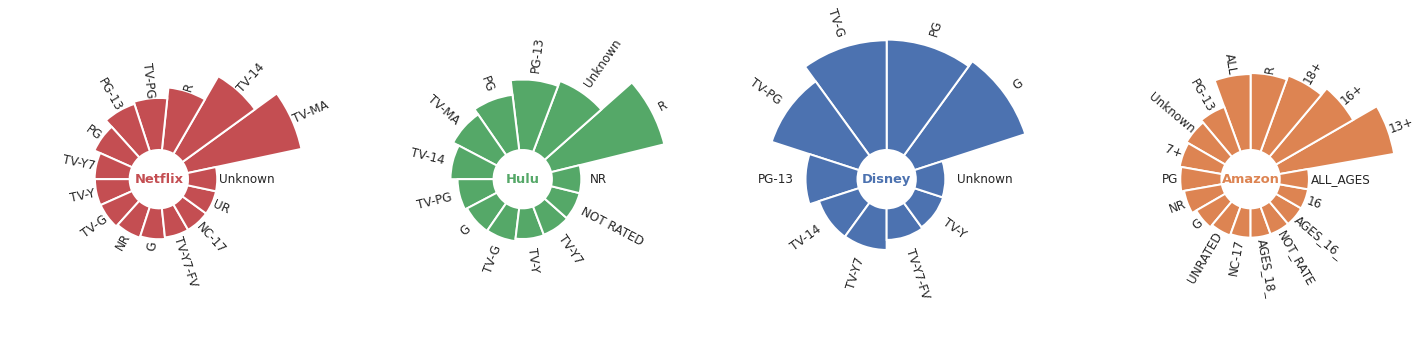

In [17]:
fig, ax = plt.subplots(1, 4, figsize=(25,50), subplot_kw=dict(polar=True))
sns.set(style='darkgrid')

for i in range(len(dataframe_dict['clean_data'])):
    #Get each dataset and subset just the Movies and rating column
    df = dataframe_dict['clean_data'][dataset_names[i]]
    data = df[df['type']=='Movie']['rating']
    data = data.value_counts()

    # Calculate chart parameters
    ax[i].axis('off')
    data_max_val = data.max()
    data_index = list(range(1, len(data) + 1))
    data_lower_limit = data_max_val / 4
    data_slope = (data_max_val - data_lower_limit) / data_max_val
    data_heights = data_slope * data + data_lower_limit
    data_width = 2 * np.pi / len(data)
    data_angles = [ind * data_width for ind in data_index]

    data_bars = ax[i].bar(x=data_angles, height=data_heights, width=data_width, color=dataframe_dict['colors'][list_of_colors[i]], bottom=data_lower_limit, linewidth=2)
    ax[i].text(x=0, y=0, s=dataset_names[i].title(), va='center', ha='center', fontsize=13, color=dataframe_dict['colors'][list_of_colors[i]], fontweight='bold', fontfamily='sans-serif')
    
    # Construct chart
    for j in range(len(data)):
        rotation = np.rad2deg(data_angles[j])
        alignment = ''
        if data_angles[j] >= np.pi/2 and data_angles[j] < 3*np.pi/2:
            alignment = 'right'
            rotation = rotation + 180
        else:
            alignment = 'left'

        ax[i].text(x=data_angles[j], y=(data_lower_limit+data_heights[j]+25), s=data.index[j], va='center', ha=alignment, rotation=rotation, rotation_mode='anchor')

Comparing the four platforms it appears that Netflix and Hulu streaming services have more movie suitable for adults, Amazon Prime movies selection best suited for older children, and Disney+ best suited for movies suitable for all audiences. 

**Netflix**   
Movies analyzed consisted of 34% rated TV-MA and an additional 13% rated R. This makes up almost 50% of the movies analyzed from Netflix are intended for adult audiences. The second most popular rating for Netflix movies is TV-14, which made up 23% of movies analyzed. Outside of content intended for an adult audience there is a decent number of movies intended for children however the movies are intended for ages 14 and older in the company of an adult and parents are strongly cautioned. 

**Hulu**   
Of the movies analyzed the most common rating was R making up 34% of the movies analyzed. However, the second most common rating of Unknown made up 18% of the movies. The Unknown rating are those movies that did not have a rating specified in the initial dataset. Lastly, the third most common rating of movies was PG-13 consisting of 16% of the movies and indicating that movies suitable for older children are common. 

**Amazon Prime**   
The top three most common rating for Amazon Prime movies ere 18+, 16+, and 13+ making up 14%, 16%, and 24%, respectively. Indicating that the most common movie ratings are for movies suitable for older children and adults.

**Disney+**   
Disney+ movies are more suitable for general audiences or audiences of all ages with the top three most common rating of movies analyzed being TV-G, PG, and G making up almost three quarters of the movies at  22%, 22%, and 24%, respectively.

##### 7.2.2.1 Movie Rating Details

In [18]:
for i in range(len(dataframe_dict['clean_data'])):
    df = dataframe_dict['clean_data'][dataset_names[i]]
    data = df[df['type'] == 'Movie'][['rating', 'title']]
    rating_count = data.groupby('rating').count().sort_values('title', ascending=False)[:3]

    list_of_ratings = rating_count.index

    print(dataset_names[i].title())
    for j in range(len(rating_count)):
        per_rating = round(rating_count.loc[list_of_ratings[j]]['title']/len(data)*100,0)
        print(f'The percentage of Movies that are {list_of_ratings[j]}: {per_rating}%')

Netflix
The percentage of Movies that are TV-MA: 34.0%
The percentage of Movies that are TV-14: 23.0%
The percentage of Movies that are R: 13.0%
Hulu
The percentage of Movies that are R: 34.0%
The percentage of Movies that are Unknown: 18.0%
The percentage of Movies that are PG-13: 16.0%
Disney
The percentage of Movies that are G: 24.0%
The percentage of Movies that are PG: 22.0%
The percentage of Movies that are TV-G: 22.0%
Amazon
The percentage of Movies that are 13+: 24.0%
The percentage of Movies that are 16+: 16.0%
The percentage of Movies that are 18+: 14.0%


#### 7.2.3 Media Type: TV Show

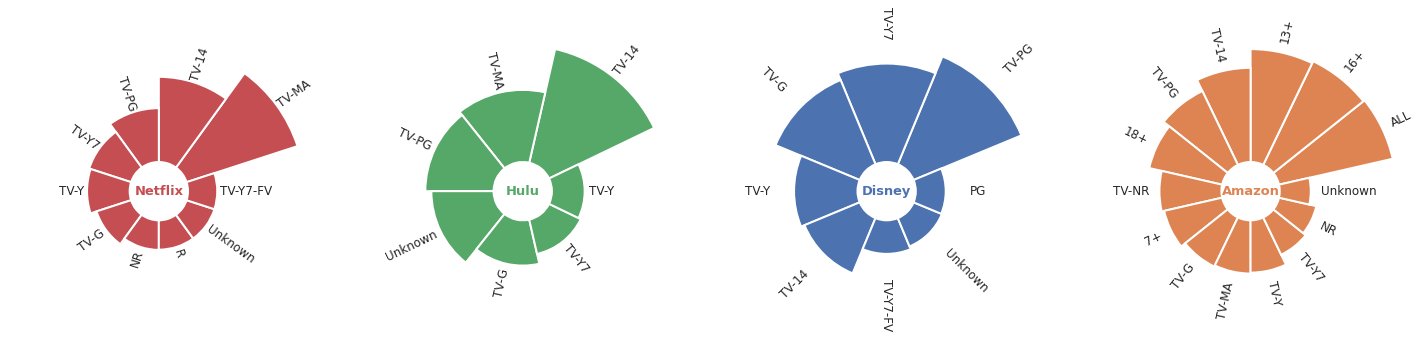

In [19]:
fig, ax = plt.subplots(1, 4, figsize=(25,50), subplot_kw=dict(polar=True))
sns.set(style='darkgrid')

for i in range(len(dataframe_dict['clean_data'])):
    #Get each dataset and subset just the Movies and rating column
    df = dataframe_dict['clean_data'][dataset_names[i]]
    data = df[df['type']=='TV Show']['rating']
    data = data.value_counts()

    # Calculate chart parameters
    ax[i].axis('off')
    data_max_val = data.max()
    data_index = list(range(1, len(data) + 1))
    data_lower_limit = data_max_val / 4
    data_slope = (data_max_val - data_lower_limit) / data_max_val
    data_heights = data_slope * data + data_lower_limit
    data_width = 2 * np.pi / len(data)
    data_angles = [ind * data_width for ind in data_index]

    data_bars = ax[i].bar(x=data_angles, height=data_heights, width=data_width, color=dataframe_dict['colors'][list_of_colors[i]], bottom=data_lower_limit, linewidth=2)
    ax[i].text(x=0, y=0, s=dataset_names[i].title(), va='center', ha='center', fontsize=13, color=dataframe_dict['colors'][list_of_colors[i]], fontweight='bold', fontfamily='sans-serif')
    
    # Construct chart
    for j in range(len(data)):
        rotation = np.rad2deg(data_angles[j])
        alignment = ''
        if data_angles[j] >= np.pi/2 and data_angles[j] < 3*np.pi/2:
            alignment = 'right'
            rotation = rotation + 180
        else:
            alignment = 'left'

        ax[i].text(x=data_angles[j], y=(data_lower_limit+data_heights[j]+25), s=data.index[j], va='center', ha=alignment, rotation=rotation, rotation_mode='anchor')

In general TV shows across all four platforms are more suitable for a younger audience then movies. Two or more of the top 3 most common TV show ratings on all platforms have ratings for general audiences or ratings that are with some parental guidance suitable for varying ages of children. 

**Netflix**   
Similar to movies, the most common TV show rating for Netflix is rated TV-MA, or for mature audiences, making up 43% of the TV shows analyzed. However, unlike movies the next two most common ratings for TV shows analyzed from Netflix are suitable to some extend children with TV-14 making up 27% and TV-PG at 12% of TV shows analyzed.

**Hulu**   
The most common rating of TV shows analyzed on Hulu were TV-14, TV-MA, and TV-PG consisting of 17%, 19%, and 38% of the dataset, respectively. This indicates that almost half of the TV shows analyzed from Hulu were suitable to some extended children, however there is still a considerable amount to TV shows intended only for mature audiences.

**Disney+**   
Similar to the movies on Disney+ the TV shows in general are suitable for general audiences with parental guidance or intended for older children. The most common TV show rating of shows analyzed are TV-PG, TV-Y7, and TV-G with percentages of 30%, 24%, 21%, respectively.

**Amazon Prime**   
The proportions of the top three most common TV show rating for Amazon Prime are very similar with the top two, ALL and 16+, tied with 15% followed by 13+ with 14%.

##### 7.2.3.1 TV Show Rating Details

In [20]:
for i in range(len(dataframe_dict['clean_data'])):
    df = dataframe_dict['clean_data'][dataset_names[i]]
    data = df[df['type'] == 'TV Show'][['rating', 'title']]
    rating_count = data.groupby('rating').count().sort_values('title', ascending=False)[:3]

    list_of_ratings = rating_count.index

    print(dataset_names[i].title())
    for j in range(len(rating_count)):
        per_rating = round(rating_count.loc[list_of_ratings[j]]['title']/len(data)*100,0)
        print(f'The percentage of TV shows that are {list_of_ratings[j]}: {per_rating}%')


Netflix
The percentage of TV shows that are TV-MA: 43.0%
The percentage of TV shows that are TV-14: 27.0%
The percentage of TV shows that are TV-PG: 12.0%
Hulu
The percentage of TV shows that are TV-14: 38.0%
The percentage of TV shows that are TV-MA: 19.0%
The percentage of TV shows that are TV-PG: 17.0%
Disney
The percentage of TV shows that are TV-PG: 30.0%
The percentage of TV shows that are TV-Y7: 24.0%
The percentage of TV shows that are TV-G: 21.0%
Amazon
The percentage of TV shows that are ALL: 15.0%
The percentage of TV shows that are 16+: 15.0%
The percentage of TV shows that are 13+: 14.0%


### 7.3 Duration through Time

#### 7.3.1 Media Type: Movie

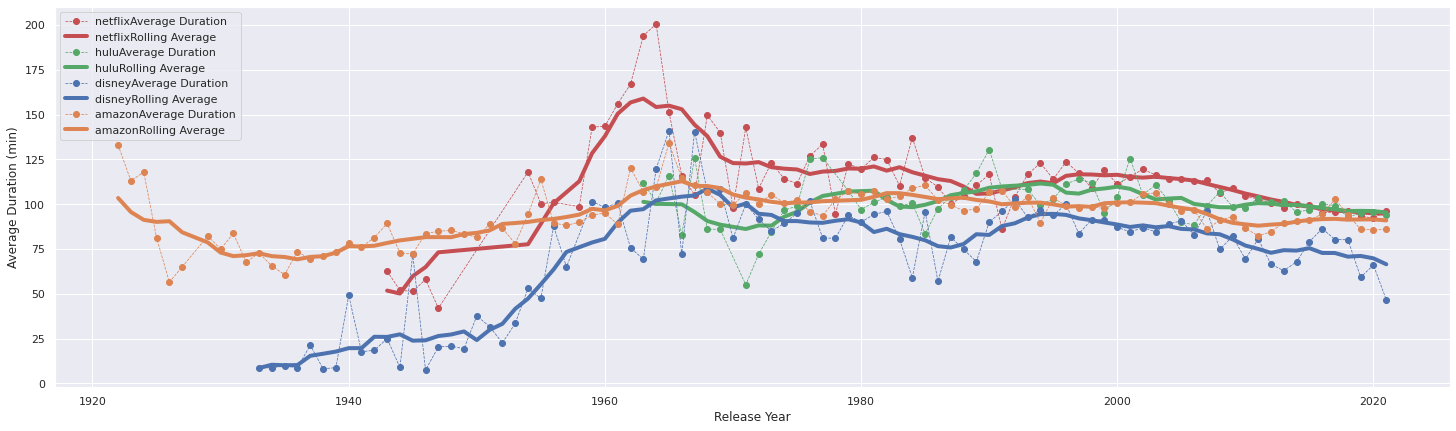

In [21]:
fig, ax = plt.subplots(1, 1, figsize=(25,7))
sns.set(style='darkgrid')

for i in range(len(dataframe_dict['clean_data'])):
    df = dataframe_dict['clean_data'][dataset_names[i]]
    data = df[df['type'] == 'Movie'][['release_year', 'duration_value']].groupby(['release_year'])

    data_mean_duration = data.mean()
    data_mean_duration['duration_rolling'] = data_mean_duration['duration_value'].rolling(8, min_periods=1, center=True).mean()

    # Only include years after the earliest year that had more than 25 movies
    data_count = data.count()
    data_filter_year = data_count[data_count['duration_value'] > 1].index[0]
    data_mean_duration = data_mean_duration[data_mean_duration.index > data_filter_year]

    data_xticks = data_mean_duration.index
    
    plt.plot(data_xticks, data_mean_duration['duration_value'], lw=0.75, ls='--', marker='o', label=(dataset_names[i] + 'Average Duration'), color=dataframe_dict['colors'][list_of_colors[i]])
    plt.plot(data_xticks, data_mean_duration['duration_rolling'], lw=4, ls='-', label=(dataset_names[i] + 'Rolling Average'), color=dataframe_dict['colors'][list_of_colors[i]])

plt.xlabel('Release Year')
plt.ylabel('Average Duration (min)')
plt.legend(loc = 'upper left')
plt.show()

The duration through time plot starts each dataset on the first year there was more than a single film released that year. Amazon Prime contained the earliest year that met this requirement followed by Disney+, Netflix, and then Hulu. The movies on Disney+ on average are shorter than the other stream platforms, while until recent movies, movies on Netflix were typically longer. Of the streaming services with durations plotted prior to 1960 all appear to have a peak in duration during the mid-1960s to 1970s. This trend is most obvious in movies on Netflix where the average duration per release year increase from approximately 60 minutes to 200 minutes. Since the mid 1970s movies on all platforms appear to slightly vary between 75 to 125 minutes. In the late 2010s the movies on Netflix, Hulu, and Amazon Prime all seem to be converging on a duration of approximately 90 minutes, while movies on Disney+ appear to be decreasing since roughly 2000. There could be two causes for this decrease seen in duration of Disney+ movies, 1) as was seen in duration by type analysis Disney+ contained a high number of movies with durations <5 minutes and or trailers to movies, both of which could be driving down the average duration observed. And 2) much of Disney+ movies were suitable for children which may explain the shorter duration compared to the other platforms that had a high number of movies suitable only for mature audiences which may enjoy longer movies.

#### 7.3.2 Media Type: TV Show

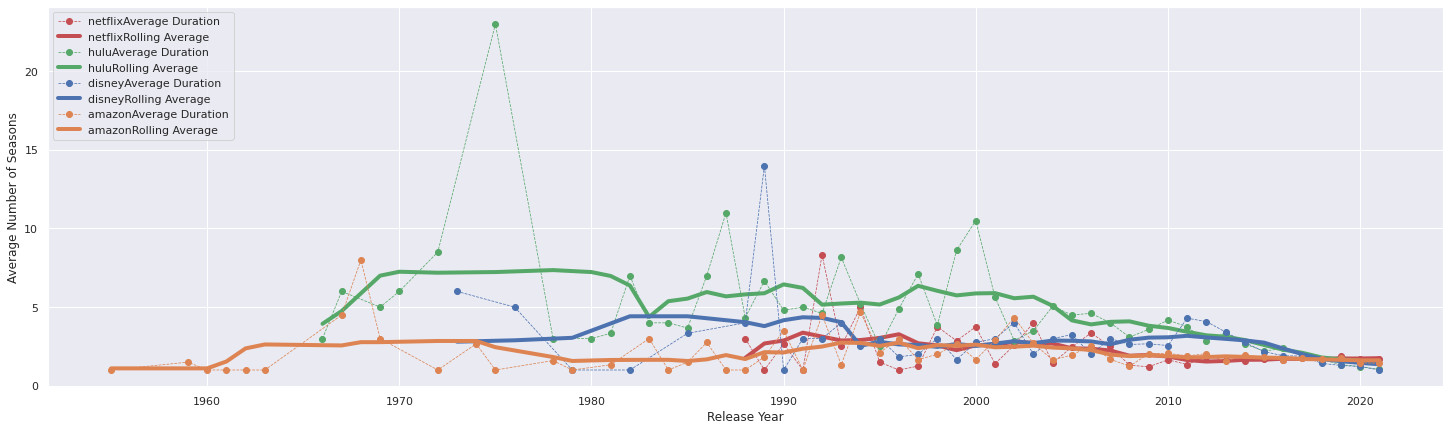

In [22]:
fig, ax = plt.subplots(1, 1, figsize=(25,7))
sns.set(style='darkgrid')

for i in range(len(dataframe_dict['clean_data'])):
    df = dataframe_dict['clean_data'][dataset_names[i]]
    data = df[df['type'] == 'TV Show'][['release_year', 'duration_value']].groupby(['release_year'])

    data_mean_duration = data.mean()
    data_mean_duration['duration_rolling'] = data_mean_duration['duration_value'].rolling(8, min_periods=1, center=True).mean()

    # Only include years after the earliest year that had more than 25 movies
    data_count = data.count()
    data_filter_year = data_count[data_count['duration_value'] > 1].index[0]
    data_mean_duration = data_mean_duration[data_mean_duration.index > data_filter_year]

    data_xticks = data_mean_duration.index
    
    plt.plot(data_xticks, data_mean_duration['duration_value'], lw=0.75, ls='--', marker='o', label=(dataset_names[i] + 'Average Duration'), color=dataframe_dict['colors'][list_of_colors[i]])
    plt.plot(data_xticks, data_mean_duration['duration_rolling'], lw=4, ls='-', label=(dataset_names[i] + 'Rolling Average'), color=dataframe_dict['colors'][list_of_colors[i]])

plt.xlabel('Release Year')
plt.ylabel('Average Number of Seasons')
plt.legend(loc = 'upper left')
plt.show()

The number of seasons based on release year show a decreasing trend for more recent TV shows. The average number of season for each platform remained relatively consistent until the late 2000s. Following the 2000s there appears to be a clear decreasing trend in the number of season a TV show has and in the late 2010s across all platforms the average duration is approximately 1 season. This likely is associated with recent TV shows hosted on each platform being "original" series which typically run for only a single to a couple of seasons compared to older TV shows that were cable TV shows that could also be viewed on the streaming services, in particular Hulu.